## Embedding creation

Here we generate the embeddings (idk probably we can add more noise or do it differently)

In [2]:
import numpy as np
import pandas as pd

def generate_meeting_dataset(
    n_employees=5,
    embedding_dim=128,
    n_meetings=100,
    random_state=42,
):
    """
    Each employee = one Gaussian distribution.
    Each meeting = one row in the dataset.
    In each meeting, we sample 1 task embedding for each of the 5 employees.
    Each row therefore contains a matrix of shape (n_employees, embedding_dim).
    """
    rng = np.random.default_rng(random_state)

    means = rng.normal(loc=0.0, scale=5.0, size=(n_employees, embedding_dim))
    scales = rng.uniform(0.5, 1.5, size=(n_employees, embedding_dim)) 

    mixture_weights = rng.random(n_employees)
    mixture_weights /= mixture_weights.sum()

    meeting_ids = np.arange(n_meetings)
    embeddings_per_meeting = []  
    transcripts = []

    for m_id in meeting_ids:
    
        embs_this_meeting = np.zeros((n_employees, embedding_dim))

        for emp in range(n_employees):
            mu = means[emp]
            sigma = scales[emp]
            embs_this_meeting[emp] = rng.normal(loc=mu, scale=sigma)

        embeddings_per_meeting.append(embs_this_meeting)

        transcripts.append(f"Meeting {m_id} involving all {n_employees} employees")

    df = pd.DataFrame({
        "meeting_id": meeting_ids,
        "embeddings": embeddings_per_meeting,
        "transcript": transcripts,
    })

    return df, means, scales, mixture_weights


df, means, scales, mixture_weights = generate_meeting_dataset(
    n_employees=5,
    embedding_dim=128,
    n_meetings=100
)

print(df.head())
print("Shape embeddings di una riga:", df["embeddings"].iloc[0].shape)  # (5, 128)

   meeting_id                                         embeddings  \
0           0  [[1.0670380662115238, -4.712180139398905, 2.81...   
1           1  [[2.1955502429580416, -9.013907558911821, 5.53...   
2           2  [[0.9955835973550552, -7.925952425636642, 4.33...   
3           3  [[1.628611446393988, -6.743466884832892, 3.578...   
4           4  [[1.3070578342028933, -6.2128819256469425, 5.8...   

                            transcript  
0  Meeting 0 involving all 5 employees  
1  Meeting 1 involving all 5 employees  
2  Meeting 2 involving all 5 employees  
3  Meeting 3 involving all 5 employees  
4  Meeting 4 involving all 5 employees  
Shape embeddings di una riga: (5, 128)


## Visualization

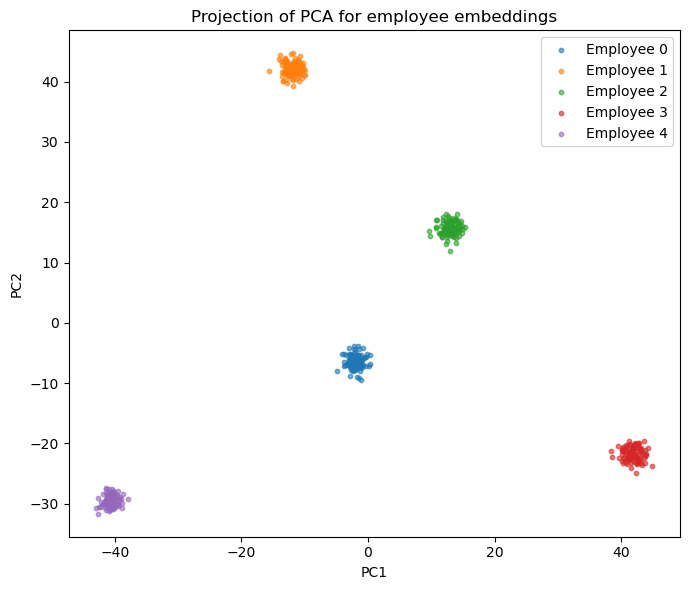

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

all_embs = []
emp_ids = []

for _, row in df.iterrows():
    embs = row["embeddings"]  
    for emp in range(embs.shape[0]):
        all_embs.append(embs[emp])
        emp_ids.append(emp)

all_embs = np.array(all_embs)
emp_ids = np.array(emp_ids)

pca = PCA(n_components=2, random_state=42)
embs_2d = pca.fit_transform(all_embs)

plt.figure(figsize=(7, 6))
for emp in range(df["embeddings"].iloc[0].shape[0]):
    mask = emp_ids == emp
    plt.scatter(
        embs_2d[mask, 0],
        embs_2d[mask, 1],
        s=10,
        alpha=0.6,
        label=f"Employee {emp}",
    )

plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection of PCA for employee embeddings")
plt.tight_layout()
plt.show()

## Generate tasks for each meeting for each employee

I did for a bank even if it's dangerous but it can be easily changed (I did it just to see if it works)

In [ ]:
import pandas as pd
from itertools import product

def generate_tasks_from_components(part1, part2, part3, template, n_tasks=100):
    tasks = []
    for a, b, c in product(part1, part2, part3):
        tasks.append(template.format(a=a, b=b, c=c))
        if len(tasks) >= n_tasks:
            break
    return tasks

roles = {
    1: "analyst",
    2: "manager",
    3: "engineer",
    4: "risk_officer",
    5: "compliance_officer",
}

all_rows = []

# --- Analyst (employee_1) ---
part1 = ["Analyze", "Review", "Prepare", "Summarize", "Forecast"]
part2 = ["profitability", "credit risk", "liquidity", "capital adequacy", "customer churn"]
part3 = ["for retail banking clients", "for corporate lending portfolio",
         "for small business loans", "for mortgage products", "for wealth management clients"]
template = "{a} {b} {c}."
analyst_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in analyst_tasks:
    all_rows.append({
        "employee_id": 1,
        "role": roles[1],
        "task_description": task,
    })

# --- Manager (employee_2) ---
part1 = ["Plan", "Supervise", "Approve", "Monitor", "Coordinate"]
part2 = ["branch performance", "team targets", "budget allocation", "sales campaigns", "operational efficiency"]
part3 = ["for the retail division", "for the corporate division",
         "for the digital channels", "for the wealth management unit", "for the back-office team"]
template = "{a} {b} {c}."
manager_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in manager_tasks:
    all_rows.append({
        "employee_id": 2,
        "role": roles[2],
        "task_description": task,
    })

# --- Engineer (employee_3) ---
part1 = ["Design", "Implement", "Optimize", "Monitor", "Debug"]
part2 = ["payment processing services", "transaction monitoring pipelines",
         "core banking APIs", "data ingestion jobs", "fraud detection models"]
part3 = ["for high availability", "for low latency", "for better scalability",
         "for improved security", "for regulatory reporting needs"]
template = "{a} {b} {c}."
engineer_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in engineer_tasks:
    all_rows.append({
        "employee_id": 3,
        "role": roles[3],
        "task_description": task,
    })

# --- Risk Officer (employee_4) ---
part1 = ["Assess", "Update", "Approve", "Document", "Review"]
part2 = ["credit risk limits", "market risk exposure", "operational risk incidents",
         "stress test scenarios", "counterparty risk reports"]
part3 = ["for corporate clients", "for trading activities",
         "for retail products", "for treasury operations", "for new product proposals"]
template = "{a} {b} {c}."
risk_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in risk_tasks:
    all_rows.append({
        "employee_id": 4,
        "role": roles[4],
        "task_description": task,
    })

# --- Compliance Officer (employee_5) ---
part1 = ["Conduct", "Document", "Investigate", "Report", "Verify"]
part2 = ["KYC reviews", "AML alerts", "regulatory breaches",
         "internal policy exceptions", "suspicious transactions"]
part3 = ["for high-risk clients", "for new account openings",
         "for international wire transfers", "for politically exposed persons",
         "for large cash deposits"]
template = "{a} {b} {c}."
compliance_tasks = generate_tasks_from_components(part1, part2, part3, template)

for task in compliance_tasks:
    all_rows.append({
        "employee_id": 5,
        "role": roles[5],
        "task_description": task,
    })


df_tasks = pd.DataFrame(all_rows)

print(df_tasks.head())
print("Totale righe:", len(df_tasks))  

csv_path = "bank_employee_tasks.csv"
df_tasks.to_csv(csv_path, index=False)
csv_path

   employee_id     role                                   task_description
0            1  analyst  Analyze profitability for retail banking clients.
1            1  analyst  Analyze profitability for corporate lending po...
2            1  analyst    Analyze profitability for small business loans.
3            1  analyst       Analyze profitability for mortgage products.
4            1  analyst  Analyze profitability for wealth management cl...
Totale righe: 500


'bank_employee_tasks.csv'

## Creation Dataset useful for prediction

This dataset involves only the embeddings and the employee_id. However, I think probably is better to use the dataset as suggested by Christina (https://www.kaggle.com/datasets/eustaceameliat/extended-skill-task-assignment) and group by some rows to generate meeting as done at the end of the notebook.

In [ ]:
import numpy as np
import pandas as pd

df_tasks = pd.read_csv("bank_employee_tasks.csv")

tasks_by_emp = {
    emp_id: group["task_description"].tolist()
    for emp_id, group in df_tasks.groupby("employee_id")
}


rows = []

for _, row in df.iterrows():  
    meeting_id = row["meeting_id"]
    embs = row["embeddings"]          # shape (5, 128)
    n_employees = embs.shape[0]       

    row_dict = {"meeting_id": meeting_id}

    for emp_idx in range(n_employees):
        emp_id = emp_idx + 1  

        candidate_tasks = tasks_by_emp[emp_id]
        task_desc = np.random.choice(candidate_tasks)


        col_suffix = emp_id 

        row_dict[f"employee_id_{col_suffix}"] = emp_id
        row_dict[f"task_{col_suffix}"] = task_desc
        row_dict[f"embedding_{col_suffix}"] = embs[emp_idx]  # np.array (128,)

    rows.append(row_dict)

df_meetings_wide = pd.DataFrame(rows)

print(df_meetings_wide.head())
print("Numero righe (meeting):", len(df_meetings_wide))
print("Esempio embedding_1 shape:", df_meetings_wide["embedding_1"].iloc[0].shape)

   meeting_id  employee_id_1  \
0           0              1   
1           1              1   
2           2              1   
3           3              1   
4           4              1   

                                              task_1  \
0     Summarize profitability for mortgage products.   
1           Prepare liquidity for mortgage products.   
2  Analyze profitability for wealth management cl...   
3         Review liquidity for small business loans.   
4       Review credit risk for small business loans.   

                                         embedding_1  employee_id_2  \
0  [1.0670380662115238, -4.712180139398905, 2.817...              2   
1  [2.1955502429580416, -9.013907558911821, 5.536...              2   
2  [0.9955835973550552, -7.925952425636642, 4.335...              2   
3  [1.628611446393988, -6.743466884832892, 3.5786...              2   
4  [1.3070578342028933, -6.2128819256469425, 5.89...              2   

                                           

In [ ]:
# Dataset with tasks and embeddings
output_path = "meetings_with_tasks.csv"
df_meetings_wide.to_csv(output_path, index=False)
output_path
df_meetings_wide_csv = pd.read_csv("meetings_with_tasks.csv")
df_meetings_wide_csv.head()

,meeting_id,employee_id_1,task_1,embedding_1,employee_id_2,task_2,embedding_2,employee_id_3,task_3,embedding_3,employee_id_4,task_4,embedding_4,employee_id_5,task_5,embedding_5
0,0,1,Summarize profitability for mortgage products.,[ 1.06703807 -4.71218014 2.81763858 4.72...,2,Plan operational efficiency for the wealth man...,[-2.51512672 -4.80453811 -2.1217895 -7.138616...,3,Implement data ingestion jobs for low latency.,[ -0.69903387 -1.19142734 -0.09022709 -6.66...,4,Update operational risk incidents for new prod...,[ -7.71632362 -6.02588074 2.67133576 2.72...,5,Document KYC reviews for politically exposed p...,[ 1.09429824 0.44178961 4.73974359 -0.26...
1,1,1,Prepare liquidity for mortgage products.,[ 2.19555024 -9.01390756 5.53621876 2.27...,2,Monitor branch performance for the back-office...,[ -2.6653719 -4.28316889 -0.32681933 -7.27...,3,Design payment processing services for better ...,[ 1.18012542 -2.56889769 -1.55597891 -7.59...,4,Update stress test scenarios for new product p...,[ -6.0855414 -4.84657035 1.87884398 2.38...,5,Report AML alerts for high-risk clients.,[ 5.84990845e-01 3.84905759e-01 5.44650423e+...
2,2,1,Analyze profitability for wealth management cl...,[ 0.9955836 -7.92595243 4.33532349 4.40...,2,Monitor budget allocation for the digital chan...,[ -2.48602879 -4.75028906 -1.1062654 -7.24...,3,Optimize transaction monitoring pipelines for ...,[ 2.54841000e+00 -3.41748525e+00 -1.33031887e+...,4,Document credit risk limits for treasury opera...,[ -9.32574546 -2.31043558 1.9456481 2.03...,5,Investigate AML alerts for international wire ...,[ 2.45638021e-01 -4.27530934e-01 4.13572423e+...
3,3,1,Review liquidity for small business loans.,[ 1.62861145 -6.74346688 3.57869624 5.54...,2,Supervise operational efficiency for the retai...,[ -4.12734821 -4.79879955 -1.80894371 -6.47...,3,Implement data ingestion jobs for improved sec...,[ 1.44938909 -1.92294352 -2.31741689 -6.40...,4,Approve stress test scenarios for trading acti...,[ -7.75278584 -3.75339979 2.54910053 1.58...,5,Investigate suspicious transactions for politi...,[ 0.95074606 -0.59744555 3.82753392 2.47...
4,4,1,Review credit risk for small business loans.,[ 1.30705783e+00 -6.21288193e+00 5.89710637e+...,2,Supervise team targets for the retail division.,[ -2.4417099 -3.92276632 -1.51142762 -7.11...,3,Monitor payment processing services for better...,[ 1.57991067 -1.03802743 1.70386807 -6.83...,4,Assess counterparty risk reports for treasury ...,[-7.10326431e+00 -3.41313791e+00 3.28012633e+...,5,Document internal policy exceptions for new ac...,[ 1.10769278e-02 -1.72702997e-01 3.32091208e+...


## Generate meeting text from 

In [ ]:
import os
import openai
import pandas as pd
from tqdm.auto import tqdm

os.environ["OPENAI_API_KEY"] = #put your apy key here or just ask me (francesco) and I will give you mine (i don't pay btw)

client = openai.OpenAI(
    api_key=os.environ["OPENAI_API_KEY"],  
    base_url="https://litellm.sph-prod.ethz.ch/v1",
)

In [ ]:
def build_prompt_from_row(row):
    """
    Use the 5 tasks in the row to request a brief meeting.
    """
    lines = []
    for i in range(1, 6):
        emp_id = row[f"employee_id_{i}"]
        task = row[f"task_{i}"]
        lines.append(f"Employee {emp_id}: {task}")
    tasks_block = "\n".join(lines)

    prompt = f"""
You are generating a realistic short meeting transcript in a bank.

Here are the tasks that each employee is working on in this meeting:
{tasks_block}

Write a meeting transcript in English (20 sentences), where the participants discuss these tasks.
Do not list the tasks; write it as natural dialogue with turns like 'Analyst:', 'Manager:', 'Engineer:', 'Risk Officer:', 'Compliance Officer:'. It is important that the dialogue is natural and not a list of tasks and that you use only the employees that I have listed here!!
"""
    return prompt.strip()

In [ ]:
df = pd.read_csv("meetings_with_tasks.csv")

transcripts = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    prompt = build_prompt_from_row(row)

    response = client.chat.completions.create(
        model="anthropic/claude-sonnet-4-5",  # come nel tuo esempio SPH
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        temperature=0.7,
        max_tokens=400,
    )

    text = response.choices[0].message.content.strip()
    transcripts.append(text)

# Aggiungi la colonna al DataFrame
df["meeting_transcript"] = transcripts

# Salva nuovo CSV
output_path = "meetings_with_tasks_with_transcript.csv"
df.to_csv(output_path, index=False)
output_path

  0%|          | 0/100 [00:00<?, ?it/s]

'meetings_with_tasks_with_transcript.csv'

In [26]:
i = 1 # ad esempio la prima riga

# Solo la stringa del transcript
transcript = df.loc[i, "meeting_transcript"]
print(transcript)

**Meeting Transcript**

Manager: Good morning everyone. Let's get started with our weekly check-in. I know we're all juggling multiple priorities right now.

Analyst: Thanks for calling this meeting. I wanted to flag that I'm seeing some concerning trends in our branch performance metrics for the back-office operations.

Manager: What kind of trends are you noticing?

Analyst: Processing times have increased by about fifteen percent over the last month, particularly in our downtown locations.

Engineer: That might actually tie into what I'm working on. I've been redesigning our payment processing architecture to handle higher volumes more efficiently.

Manager: Good timing then. How far along are you with that project?

Engineer: I'm about halfway through the design phase. The new system should be much more scalable, which should help with those bottleneck issues.

Risk Officer: Speaking of scalability, I need to make sure our stress test scenarios account for these new products we're 

In [27]:
df.head()

,meeting_id,employee_id_1,task_1,embedding_1,employee_id_2,task_2,embedding_2,employee_id_3,task_3,embedding_3,employee_id_4,task_4,embedding_4,employee_id_5,task_5,embedding_5,meeting_transcript
0,0,1,Summarize profitability for mortgage products.,[ 1.06703807 -4.71218014 2.81763858 4.72...,2,Plan operational efficiency for the wealth man...,[-2.51512672 -4.80453811 -2.1217895 -7.138616...,3,Implement data ingestion jobs for low latency.,[ -0.69903387 -1.19142734 -0.09022709 -6.66...,4,Update operational risk incidents for new prod...,[ -7.71632362 -6.02588074 2.67133576 2.72...,5,Document KYC reviews for politically exposed p...,[ 1.09429824 0.44178961 4.73974359 -0.26...,**Meeting Transcript**\n\n**Manager:** Good mo...
1,1,1,Prepare liquidity for mortgage products.,[ 2.19555024 -9.01390756 5.53621876 2.27...,2,Monitor branch performance for the back-office...,[ -2.6653719 -4.28316889 -0.32681933 -7.27...,3,Design payment processing services for better ...,[ 1.18012542 -2.56889769 -1.55597891 -7.59...,4,Update stress test scenarios for new product p...,[ -6.0855414 -4.84657035 1.87884398 2.38...,5,Report AML alerts for high-risk clients.,[ 5.84990845e-01 3.84905759e-01 5.44650423e+...,**Meeting Transcript**\n\nManager: Good mornin...
2,2,1,Analyze profitability for wealth management cl...,[ 0.9955836 -7.92595243 4.33532349 4.40...,2,Monitor budget allocation for the digital chan...,[ -2.48602879 -4.75028906 -1.1062654 -7.24...,3,Optimize transaction monitoring pipelines for ...,[ 2.54841000e+00 -3.41748525e+00 -1.33031887e+...,4,Document credit risk limits for treasury opera...,[ -9.32574546 -2.31043558 1.9456481 2.03...,5,Investigate AML alerts for international wire ...,[ 2.45638021e-01 -4.27530934e-01 4.13572423e+...,# Bank Operations Meeting Transcript\n\n**Mana...
3,3,1,Review liquidity for small business loans.,[ 1.62861145 -6.74346688 3.57869624 5.54...,2,Supervise operational efficiency for the retai...,[ -4.12734821 -4.79879955 -1.80894371 -6.47...,3,Implement data ingestion jobs for improved sec...,[ 1.44938909 -1.92294352 -2.31741689 -6.40...,4,Approve stress test scenarios for trading acti...,[ -7.75278584 -3.75339979 2.54910053 1.58...,5,Investigate suspicious transactions for politi...,[ 0.95074606 -0.59744555 3.82753392 2.47...,# Bank Meeting Transcript\n\n**Manager:** Good...
4,4,1,Review credit risk for small business loans.,[ 1.30705783e+00 -6.21288193e+00 5.89710637e+...,2,Supervise team targets for the retail division.,[ -2.4417099 -3.92276632 -1.51142762 -7.11...,3,Monitor payment processing services for better...,[ 1.57991067 -1.03802743 1.70386807 -6.83...,4,Assess counterparty risk reports for treasury ...,[-7.10326431e+00 -3.41313791e+00 3.28012633e+...,5,Document internal policy exceptions for new ac...,[ 1.10769278e-02 -1.72702997e-01 3.32091208e+...,# Bank Operations Meeting Transcript\n\n**Mana...
